In [1]:
#导入需要的包

In [2]:
from scipy.stats import binom
from sympy.utilities.iterables import subsets as combinations
from sympy.utilities.iterables import variations as permutations

import random
import matplotlib.pyplot as plt
from sympy import Rational
import matplotlib

In [3]:
#模拟抛硬币
def coin(n):
    num_0 = []
    num_1 = []
    for i in range(n):
        a = random.randint(0, 1)
        if a == 0:
            num_0.append(a)
        else:
            num_1.append(a)
    return len(num_0)/n,len(num_1)/n
print(coin(100))

(0.47, 0.53)


In [4]:
#验证抛硬币正面向上的事件频率稳定在0.5
def acc_num():
    n = 50
    acc = []
    n_num = []

    while (n <= 50000):
        acc_each = coin(n)
        acc.append(acc_each)
        n_num.append(n)
        n += 50
    return acc, n_num
acc, n_num = acc_num()

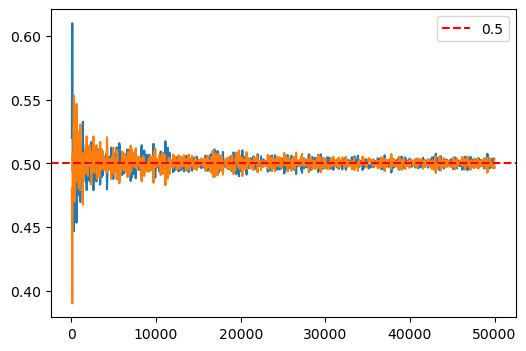

None


In [5]:
#画图展示变化（随n的增加）
def pic(acc, n_num):
    plt.figure(figsize=(6,4))
    plt.plot(n_num, acc)
    plt.axhline(float(0.5),color='red',linestyle='--',label='0.5')
    plt.legend()
    plt.show()
print(pic(acc,n_num))

#会发现频率逐步稳定在0.5

## 古典概型

In [6]:
#set类的构建，添加元素
def subset(A, condition):
    B = set()
    for x in A:
        if condition(x):
            B.add(x)
    return B

In [7]:
#计算概率函数
def P(n, s):
    return Rational(len(n), len(s))
n=[1,2,3,4]
s=[2,3,2,4,2,4,2,4]
print(P(n,s))

1/2


In [8]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
S = set(combinations(numbers, 3))  # 任选3人进行编号
A1 = subset(S, lambda a: min(a) == 5)  # 事件1 --> 3人中最小号码为5
p1 = P(A1, S)
A2 = subset(S, lambda a: max(a) == 5)  # 事件2 --> 3人中最大号码为5
p2 = P(A2, S)
print(p1,p2)

1/12 1/20


## 二项分布（n次抛硬币，k次向上（或向下）的概率）

In [9]:
#阶乘函数构造，利用递归
def jie(n):
    if n == 1 or n == 0:
        return 1
    else:
        return n*jie(n-1)

In [10]:
#组合数计算公式（C nk）
def zuhe(n, k):
    return jie(n)//(jie(k)*jie(n-k))

**假设我们连续投掷一枚质地均匀的硬币60次，画出正面朝上事件的分布律图像和分布函数图像**

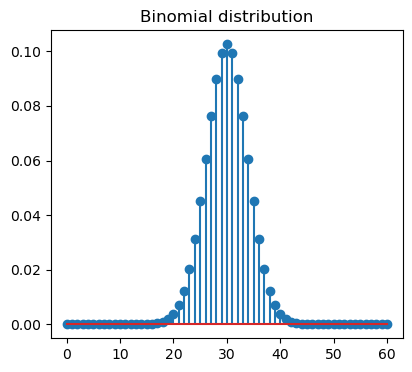

In [11]:
#60个样本点
x_values = list(range(60+1))  # 生成0到60,表示样本点
pmf_values = [zuhe(60, k)*(0.5**k)*(0.5**(60-k)) for k in x_values]  # 用二项分布的公式求对应每个次数的概率，储存起来
#绘制图像
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.stem(x_values, pmf_values)
plt.title("Binomial distribution")
plt.show()
#显示了二项分布的状态

## 算法模块

In [12]:
# 辗转相除法求两个数的最大公约数
def gcd(a, b):
    if b == 0:
        return a
    else:
        return gcd(b, a % b)


print(gcd(15, 9))
# 在此基础上求两个数的最小公倍数

def lcm(a, b):
    return a/gcd(a, b)*b
print(lcm(15, 9))

3
45.0


### 排序算法

In [13]:
# 测试样例
num = [2, 33, 1, 22, 44, 21]  # 测试样例
num_1=[2,5,5,1]

#### 1.选择排序

In [14]:
def selectSort(num):
    n = len(num)
    # 创建一个新的数组防止原数组被修改
    num_new=list(num)
    for i in range(0, n-1):  # 只进行n-1次循环
        small = num_new[i]  # small指向当前已排序的最后一个，即第i个
        p = i  # p -->指针，指向后面最小的数
        for j in range(i+1, n):  # 从第i+1个数开始往后查询
            if small > num_new[j]:
                small = num_new[j]  # 后面的查询每次遇到有一个更小的数，更新small值
                p = j  # 同样，p更新一次，最后的p即为未排序序列的最小值的索引
        num_new[i], num_new[p] = num_new[p], num_new[i]  # 交换
        print(num_new)
selectSort(num_1)
selectSort(num)

[1, 5, 5, 2]
[1, 2, 5, 5]
[1, 2, 5, 5]
[1, 33, 2, 22, 44, 21]
[1, 2, 33, 22, 44, 21]
[1, 2, 21, 22, 44, 33]
[1, 2, 21, 22, 44, 33]
[1, 2, 21, 22, 33, 44]


##### 对于选择排序，时间复杂度为O(n^2)，算法是不稳定的,打印出的两个5的相对位置其实是发生了变化

#### 2.冒泡排序

In [15]:
def bubbleSort(num):
    n = len(num)
    num_new=list(num)
    # 进行1轮的排序后，确定了一个最大值
    for i in range(n-1):  # 只进行n-1次循环，因为最后剩下的就是最小的，不用排序了
        for j in range(n-i-1):  # 每次都从第一个到未排序的最后一个
            if (num_new[j] > num_new[j+1]):
                num_new[j], num_new[j+1] = num_new[j+1], num_new[j]
        print(num_new)
bubbleSort(num)

[2, 1, 22, 33, 21, 44]
[1, 2, 22, 21, 33, 44]
[1, 2, 21, 22, 33, 44]
[1, 2, 21, 22, 33, 44]
[1, 2, 21, 22, 33, 44]


##### 对于冒泡排序时间复杂度为O(n^2),是稳定的排序算法

##### 当然可以对冒泡排序进行优化设置辅助变量内循环开始为False，若需要换位置变为True循环结束后检查这个变量，如果不曾改变说明排序已经结束不需要更换位置了

In [16]:
def bubbleSort_better(num):
    n = len(num)
    # 进行1轮的排序后，确定了一个最大值
    num_new=list(num)
    for i in range(n-1):  # 只进行n-1次循环，因为最后剩下的就是最小的，不用排序了
        check = False
        for j in range(n-i-1):  # 每次都从第一个到未排序的最后一个
            if (num_new[j] > num_new[j+1]):
                num_new[j], num_new[j+1] = num_new[j+1], num_new[j]
                check = True
        print(num_new)
        if check == False:
            break        
bubbleSort_better(num)

[2, 1, 22, 33, 21, 44]
[1, 2, 22, 21, 33, 44]
[1, 2, 21, 22, 33, 44]
[1, 2, 21, 22, 33, 44]


##### 由此可见这样会减少排序复杂度效率更高

#### 3.插入排序

In [17]:
def insertSort(num):
    n = len(num)
    num_new=list(num)
    for i in range(1, n):
        end = i-1
        tem = num_new[i]  # 先用tem存起来未排序的第一个数，因为一会儿移动过程中，会覆盖掉这个数
        while (end >= 0):
            if tem < num_new[end]: # 如果比前一个数小，则前一个数向后移动一个
                num_new[end+1] = num_new[end]
                end -= 1   
            else:
                break
        num_new[end+1] = tem   # 把tem放置到已排好序的末尾
        print(num_new)
insertSort(num)

[2, 33, 1, 22, 44, 21]
[1, 2, 33, 22, 44, 21]
[1, 2, 22, 33, 44, 21]
[1, 2, 22, 33, 44, 21]
[1, 2, 21, 22, 33, 44]


##### 在插入排序中有一个寻找位置的过程, 可以用二分法寻找

In [18]:
def insertSort_better(num):
    n = len(num)
    num_new = list(num)
    for i in range(1, n):
        tem = num_new[i]  # 即将排序的数，即未排序的第一个数
        left = 0
        right = i-1
        while left <= right:
            mid = (left+right)//2
            if tem < num_new[mid]:
                right = mid-1
            else:
                left = mid+1  # 最后得到的left即为key要插入的位置
        end = i  # 将当前即将排序的数的索引赋给j
        while end > left:
            num_new[end] = num_new[end-1]  # 把从left到i-1之间的所有数都往右移，空出来left的位置
            end -= 1
        num_new[left] = tem  # 赋值
        print(num_new)
insertSort_better(num)

[2, 33, 1, 22, 44, 21]
[1, 2, 33, 22, 44, 21]
[1, 2, 22, 33, 44, 21]
[1, 2, 22, 33, 44, 21]
[1, 2, 21, 22, 33, 44]


##### 对于插入排序时间复杂度为O(n^2), 也是稳定排序

#### 总结: 对于选择排序(不稳定),冒泡排序(稳定),插入排序(稳定) 三种排序算法的时间复杂度都是 n^2 级别算法相对简单易懂,但是效率并不高

### 微积分的计算机实现

#### 1. 关于Sympy库
Sympy是一个强大的符号计算库，专注于符号表达式的处理，不仅限于数值计算，在解决复杂数学问题时十分高效

In [19]:
# 导入Sympy库
import sympy as sp

#### 1.1 主要功能

In [20]:
# 1.1.1 创建符号变量
x=sp.Symbol('x')
# x,y,z=sp.symbols('x y z') --> 如果多个变量注意写法不同

In [21]:
# 1.1.2 求导 --> diff(表达式，自变量，求导次数)
y=x**2
ans_diff=sp.diff(y,x,1)
print(ans_diff)

2*x


In [22]:
# 1.1.3 积分 --> integrate(表达式，（积分变量，下限，上限）)
ans_inte=sp.integrate(y,(x,1,2))
print(ans_inte)

7/3


In [23]:
# 1.1.4  解方程 --> solve(表达式，自变量)
ans_solve=sp.solve(x**2-4,x)
print(ans_solve)

[-2, 2]


In [24]:
# 1.1.5 表达式简化 (约分，合并等)--> simplify(),expand(),factor()
print(sp.simplify((x**2-4)/(x-2)))

x + 2


#### 2. Limit()函数求极限

##### 2.1 主要步骤
导入sympy库 ---> 定义符号变量 ---> 使用limit()求解

##### 2.2 例题

(1 + 1/n)**n 数列的极限值为 E


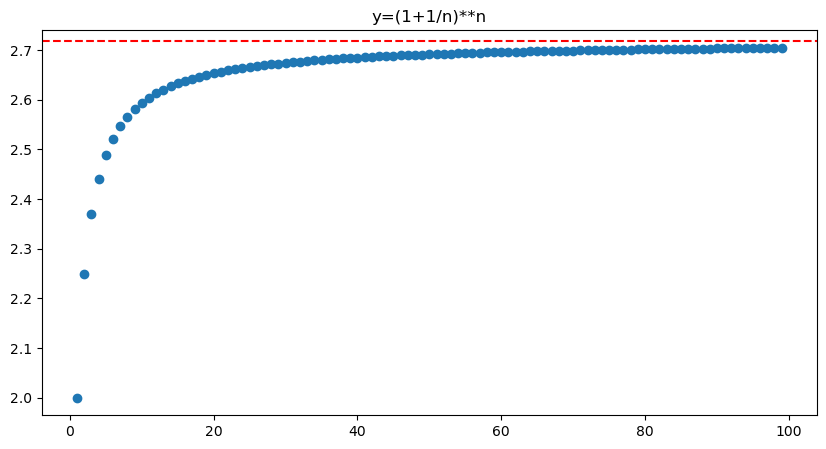

In [25]:
# 求数列极限 (1+1/n)**n n-->oo
import numpy as np
import sympy as sp
n=sp.Symbol('n')
an=(1+1/n)**n
l=sp.limit(an,n,'oo')  # 参数(数列表达式，变量，变化趋势)
print("%s 数列的极限值为 %s"%(str(an),str(l)))  # 注意是以字符串形式表达的

# 可视化
n=np.arange(1,100,1)  # 设置 n 取样点, 1~100, 间距为 1
an=(1+1/n)**n
plt.figure(figsize=(10,5)) # 作图环境
plt.title('y=(1+1/n)**n')
plt.scatter(n,an)  # 散点图
plt.axis('on')
plt.axhline(float(np.e),color='red',linestyle='--',label='y=e') 
plt.show()

sin((1 - x**2)/(1 - x))函数的在 x=1 处的左极限为 sin(2)，右极限为 sin(2)


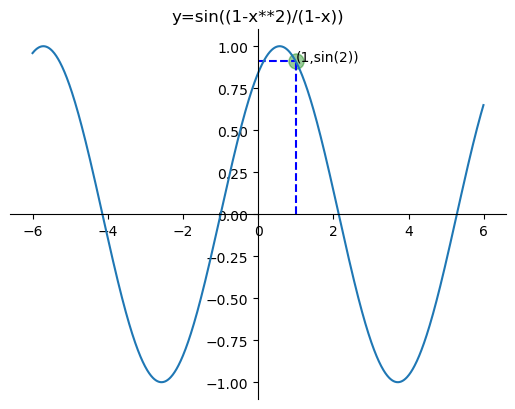

In [26]:
# 求函数 sin((1-x**2)/(1-x)) 在 x-->1 时的极限
x = sp.Symbol('x')
y = sp.sin((1-x**2)/(1-x))  # sin 与 cos 前要加上sp. ,否则只是普通的字符串
ans_left = sp.limit(y, x, 1, dir='-')  # 左极限
ans_right = sp.limit(y, x, 1, dir='+')  # 右极限
print("%s函数的在 x=1 处的左极限为 %s，右极限为 %s" % (str(y), str(ans_left), str(ans_right)))

# 可视化--->写成函数
def pic_better():
    ax = plt.gca()  # 美化坐标轴
    ax.spines['right'].set_color('none')  # 把右边框去掉
    ax.spines['top'].set_color('none')  # 把上边框去掉
    ax.spines['bottom'].set_position(('data', 0))  # 将坐标轴置于 0 处
    ax.spines['left'].set_position(('data', 0))  # 将坐标轴置于 0 处
pic_better()
x = np.arange(-6, 6, 0.01)
y = np.sin((1-x**2)/(1-x))
plt.title("y=sin((1-x**2)/(1-x))")
plt.plot([0, 1], [np.sin(2), np.sin(2)], linestyle='--',
         color='blue')  # 绘制经过[0,sin2],[1,sin2]两点的蓝色虚线
plt.plot([1, 1], [0, np.sin(2)], linestyle='--',
         color='blue')  # 绘制经过[0,sin2],[1,sin2]两点的蓝色虚线
plt.text(1, np.sin(2), '(1,sin(2))')  # 把点的坐标标注
# 在(1,sin2)处绘制大小为 120 像素透明度为 0.4 的 绿色点
plt.scatter(1, np.sin(2), s=120, color='green', alpha=0.4)
plt.plot(x, y)
plt.show()


Abs(x)/x函数的在 x=0 处的左极限为 -1，右极限为 1


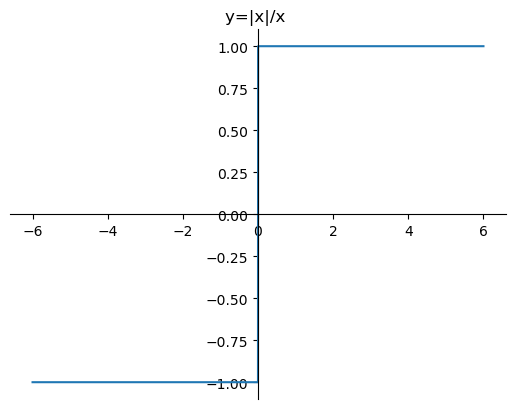

In [27]:
# 求极限 (x-->0)时 |x| / x 的极限
x = sp.Symbol('x')
y = np.abs(x)/x  # abs绝对值
ans_left = sp.limit(y, x, 0, dir='-')
ans_right = sp.limit(y, x, 0, dir='+')
print("%s函数的在 x=0 处的左极限为 %s，右极限为 %s" % (str(y), str(ans_left), str(ans_right)))

# 可视化
x = np.arange(-6, 6, 0.001)
y = np.abs(x)/x
plt.title('y=|x|/x ')
pic_better()
plt.plot(x, y)
plt.show()

#### 3.一元函数的导数求解

##### 3.1 多项式求导

3*x**5 + 2*x**4 + x**3 + x**2 + x + 1函数的微分表达式为dx*(15*x**4 + 8*x**3 + 3*x**2 + 2*x + 1)
第1阶导数为15*x**4 + 8*x**3 + 3*x**2 + 2*x + 1
第2阶导数为60*x**3 + 24*x**2 + 6*x + 2
第3阶导数为180*x**2 + 48*x + 6
第4阶导数为360*x + 48
当x=1时，四阶导数的值为：408


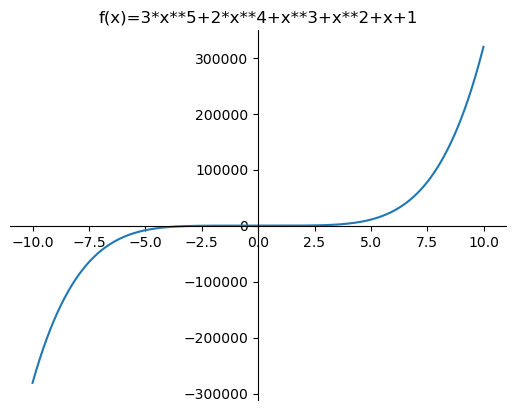

In [28]:
# f(x)=3*x**5+2*x**4+x**3+x**2+x+1 该函数的微分
x = sp.Symbol('x')
dx = sp.Symbol('dx')  # 定义微分表达式中的 dx
y = 3*x**5+2*x**4+x**3+x**2+x+1
ans = sp.diff(y, x, 1)
ans_dx = ans*dx
print("%s函数的微分表达式为%s" % (str(y), str(ans_dx)))
for n in range(1, 5):   # 从 1 到 4 的循环
    d = sp.diff(y, x, n)  # 求 1 至 4 阶的导数
    d = sp.simplify(d)  # 简化一下
    print("第%d阶导数为%s" % (n, str(d)))
ysjd = d.evalf(subs={x: 1})  # 令 x=1 赋值 --->evalf(subs={x:?}) 赋值运算
print("当x=1时，四阶导数的值为：%d" % (ysjd))

# 可视化
x = np.arange(-10, 10, 0.01)
y = 3*x**5+2*x**4+x**3+x**2+x+1
plt.plot(x, y)
plt.title("f(x)=3*x**5+2*x**4+x**3+x**2+x+1")
pic_better()
plt.show()

##### 3.2 参数方程

原参数方程的一阶导数为 -sin(t)/(cos(t) - 1)
原参数方程的二阶导数为 -1/(a*(cos(t) - 1)**2)


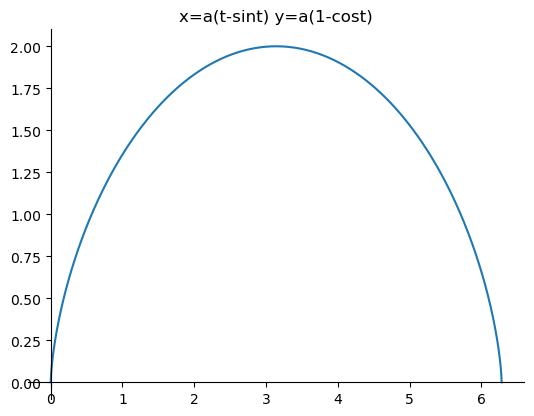

In [29]:
"""
求参数方程：x=a(t-sint)
           y=a(1-cost) 所确定的函数y=y(x)的一阶导数与二阶导数
"""
# 涉及到的变量都要有
a, t = sp.symbols('a t')
x = a*(t-sp.sin(t))
y = a*(1-sp.cos(t))
d1 = sp.diff(y, t)/sp.diff(x, t)
d1 = sp.simplify(d1)
print("原参数方程的一阶导数为 %s" % (str(d1)))
d2 = sp.diff(d1, t)/sp.diff(x, t)
d2 = sp.simplify(d2)
print("原参数方程的二阶导数为 %s" % (str(d2)))
a = 1
t = np.arange(0, 2*np.pi, 0.01)
x = a*(t-np.sin(t))
y = a*(1-np.cos(t))
plt.plot(x, y)
plt.title("x=a(t-sint) y=a(1-cost)")
pic_better()
plt.show()

##### 3.3 双曲线

切点处的斜率为-4.00000000000000
函数在该点处的切线方程为4.0 - 4.0*x
函数在该点处的法线方程为0.25*x + 1.875


C:\Users\赵博文\AppData\Local\Temp\ipykernel_4376\777035891.py:14: RuntimeWarning: divide by zero encountered in divide
  y = 1/x


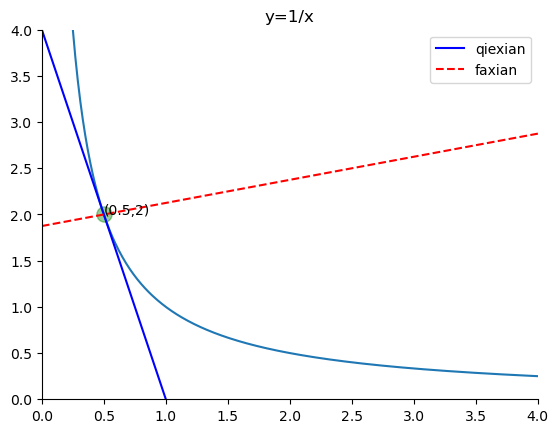

In [30]:
# 求 y=1/x 在( 1/2 , 2 )处的切线和法线方程
x = sp.Symbol('x')
y = 1/x
d = sp.diff(y, x)
k1 = d.evalf(subs={x: 1/2})
print("切点处的斜率为%s" % (str(k1)))
x = sp.Symbol('x')
f1 = k1*(x-0.5)+2
print("函数在该点处的切线方程为%s" % (str(f1)))
k2 = -1/k1
f2 = k2*(x-0.5)+2
print("函数在该点处的法线方程为%s" % (str(f2)))
x = np.arange(0, 6, 0.01)
y = 1/x
plt.axis([0, 4, 0, 4])  # 建立绘图区域
plt.plot(x, y)
plt.title("y=1/x")
pic_better()
f1 = k1*(x-0.5)+2
f2 = k2*(x-0.5)+2
plt.text(0.5, 2, '(0.5,2)')
plt.scatter(0.5, 2, s=120, color='green', alpha=0.4)     # 把(0.5,2)该点标注
plt.plot(x, f1, color='blue', linestyle='-', label=r"qiexian")  # 绘制切线
plt.plot(x, f2, color='red', linestyle='--', label=r"faxian")  # 绘制法线
plt.legend()  # 加上图例
plt.show()

#### 4.一元函数积分

函数不定积分为:atan(x)
函数从-1到sqrt(3)定积分为:7*pi/12


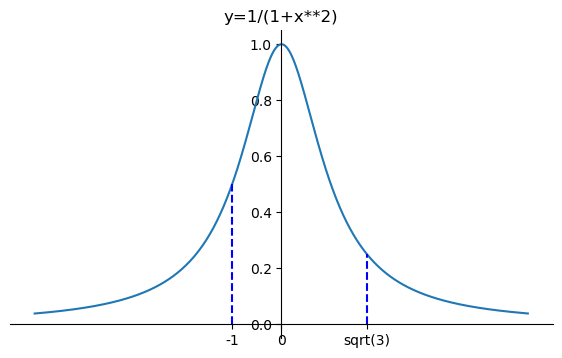

In [31]:
# 计算不定积分 --> f (1/(1+x^2)dx)

x = sp.Symbol('x')
y = 1/(1+x**2)
bdjf = sp.integrate(y, x)
print("函数不定积分为:%s" % (str(bdjf)))
djf = sp.integrate(y, (x, -1, sp.sqrt(3)))
print("函数从-1到sqrt(3)定积分为:%s" % (str(djf)))

x = np.arange(-5, 5, 0.01)
y = 1/(1+x**2)
plt.figure(figsize=(7,4))
plt.plot(x, y)
plt.title("y=1/(1+x**2)")
plt.plot([-1, -1], [0, 0.5], linestyle='--', color="blue")
plt.plot([np.sqrt(3), np.sqrt(3)], [0, 0.25], linestyle='--', color="blue")
plt.xticks([-1, 0, np.sqrt(3)], ["-1", "0", r"sqrt(3)"])
pic_better()
plt.show()

#### 5.一阶常微分方程

In [32]:
# 求解 dy/dx + y =e**(-x)

x = sp.Symbol('x')
f = sp.Function('f')  # 创建函数
y = f(x)
d = sp.Eq(y.diff(x)+y-sp.exp(-x), 0)  # 完整的微分方程式
wffc = sp.dsolve(d, y)  # 因为最后要求的是 y,所以参数是 d,y
print("微分方程的通解为:%s" % wffc)
sp.pprint(wffc)  # 漂亮的打印

微分方程的通解为:Eq(f(x), (C1 + x)*exp(-x))
                 -x
f(x) = (C₁ + x)⋅ℯ  


In [33]:
# 求微分方程 y' =2x 满足初始条件 x=1 --> y=2 的特解的方程。

x = sp.Symbol('x')
f = sp.Function('f')
y = f(x)
d = sp.Eq(y.diff(x), 2*x)
wffc = sp.dsolve(d, y, ics={f(1): 2})  # ics={f(x):y}
print("微分方程的特解为: %s " % wffc)
sp.pprint(wffc)

微分方程的特解为: Eq(f(x), x**2 + 1) 
        2    
f(x) = x  + 1
